In [16]:
import pandas as pd
import numpy as np
# To import the modules
from IPython.display import display
import matplotlib.pyplot as plt #for data visualization
import pandas as pd #For data related tasks
import numpy as np
from sklearn.linear_model import LinearRegression
import random
import yfinance as yf


In [17]:
df=yf.download('AMD', start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed


In [18]:
# To get the data
#dict = pd.read_csv("/content/AAPL5yr.csv") # you can change filename here
#data = pd.DataFrame(dict)

dict=yf.download('AMD', start='2015-01-01')
data = pd.DataFrame(dict)

# To set the date column as an index
#data = data.set_index('Date')

# To set the index into datetime
data = data.set_index(pd.DatetimeIndex(data.index.values))
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2015-01-02,2.67,2.67,2.67,2.67,2.67,0
2015-01-05,2.67,2.70,2.64,2.66,2.66,8878200
2015-01-06,2.65,2.66,2.55,2.63,2.63,13912500
2015-01-07,2.63,2.65,2.54,2.58,2.58,12377600
2015-01-08,2.59,2.65,2.56,2.61,2.61,11136600


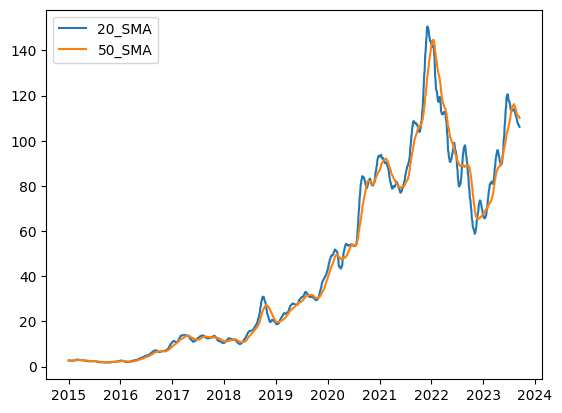

In [19]:
# To create 20 days simple moving average column
data['20_SMA'] = data['Close'].rolling(window=20, min_periods=1).mean()

# To create 50 days simple moving average column
data['50_SMA'] = data['Close'].rolling(window=50, min_periods=1).mean()

# To disply 20 days simple moving average
#plt.plot(data['20_SMA'], label='20_SMA')

# To disply 200 days simple moving average
plt.plot(data['20_SMA'], label='20_SMA')
plt.plot(data['50_SMA'], label='50_SMA')

# To give a legend
plt.legend()

# To display the graph
plt.show()



In [20]:
rows = data.shape[0]
test_size = int((rows/100)*30)
train_set = data[0:rows-test_size]
test_set = data[(rows-test_size)+1:rows]
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)

In [21]:
X_train = train_set.drop(['Close'], axis=1)
y_train = train_set['Close']

X_test = test_set.drop(['Close'], axis=1)
y_test = test_set['Close']


## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)
prediction = LR.predict(X_test)
print(LR.score(X_test,y_test))


1.0


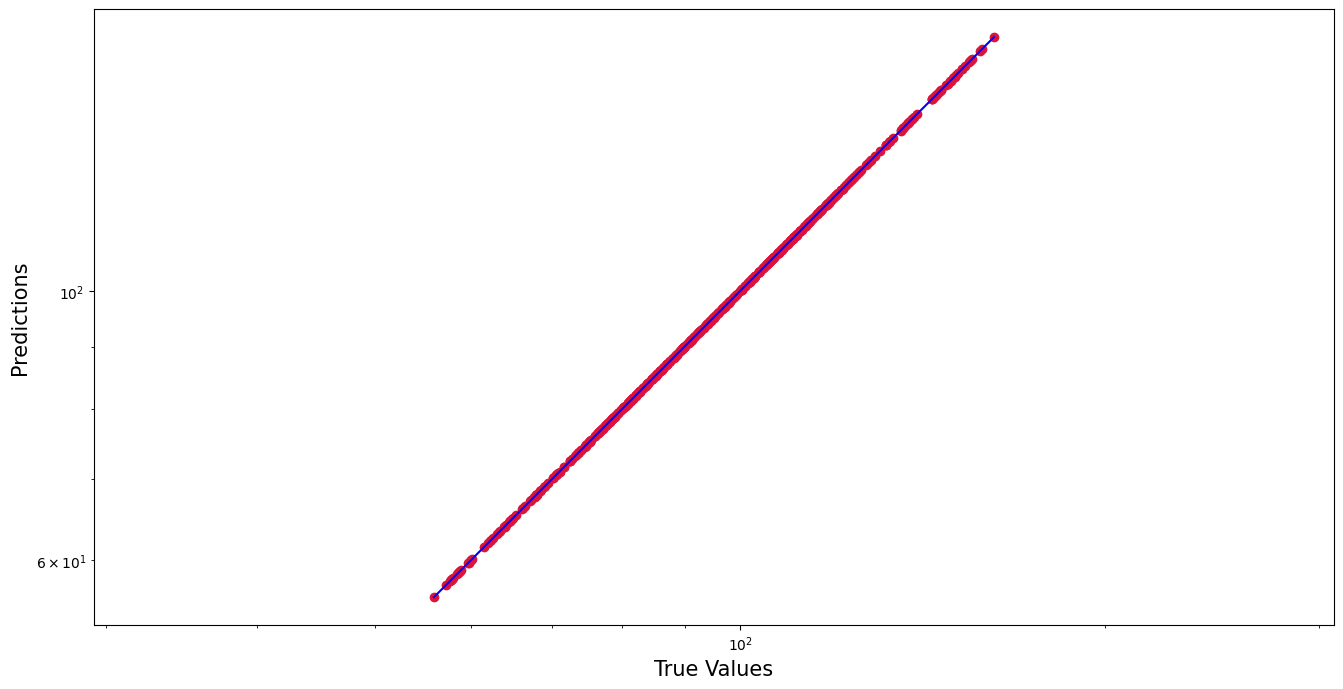

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-24-725b8dbb3789>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["y_pred"] = prediction


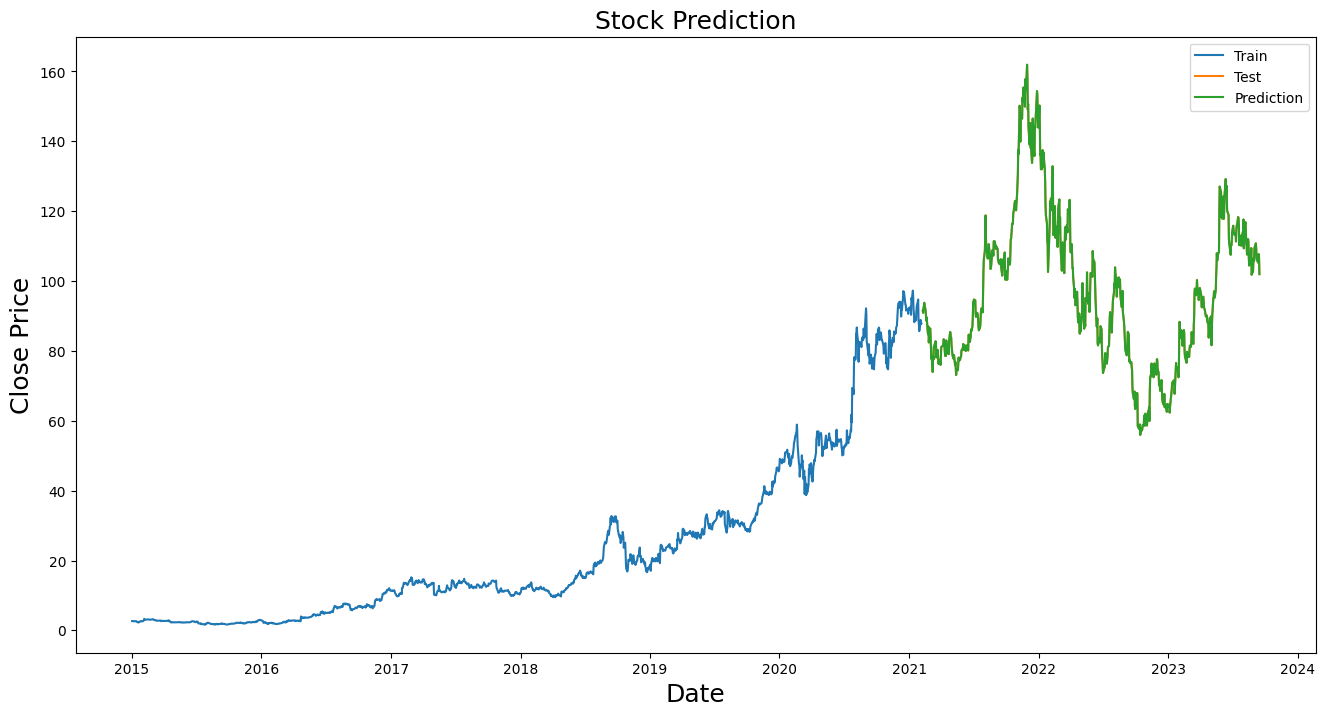

In [24]:
plt.figure(figsize=(16, 8))
plt.plot(data[0:rows-test_size]['Close'], label='Train')
test = data[(rows-test_size)+1:rows]
test["y_pred"] = prediction
plt.plot(test["Close"] ,label='Test')
plt.plot(test["y_pred"], label='Prediction')

plt.title('Stock Prediction', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.show()

## Lasso

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
prediction = lasso.predict(X_test)
print(lasso.score(X_test,y_test))


0.9970645652397101


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.752e+02, tolerance: 8.964e+01
  model = cd_fast.enet_coordinate_descent(


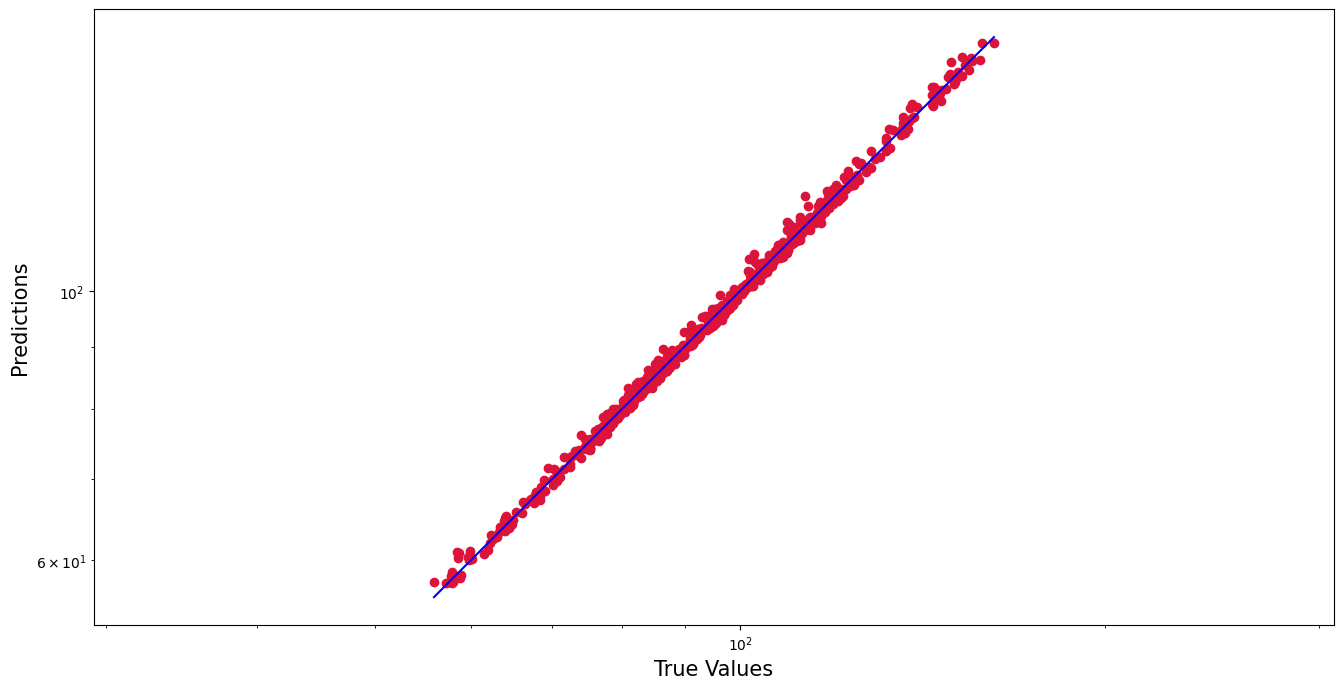

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-27-725b8dbb3789>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["y_pred"] = prediction


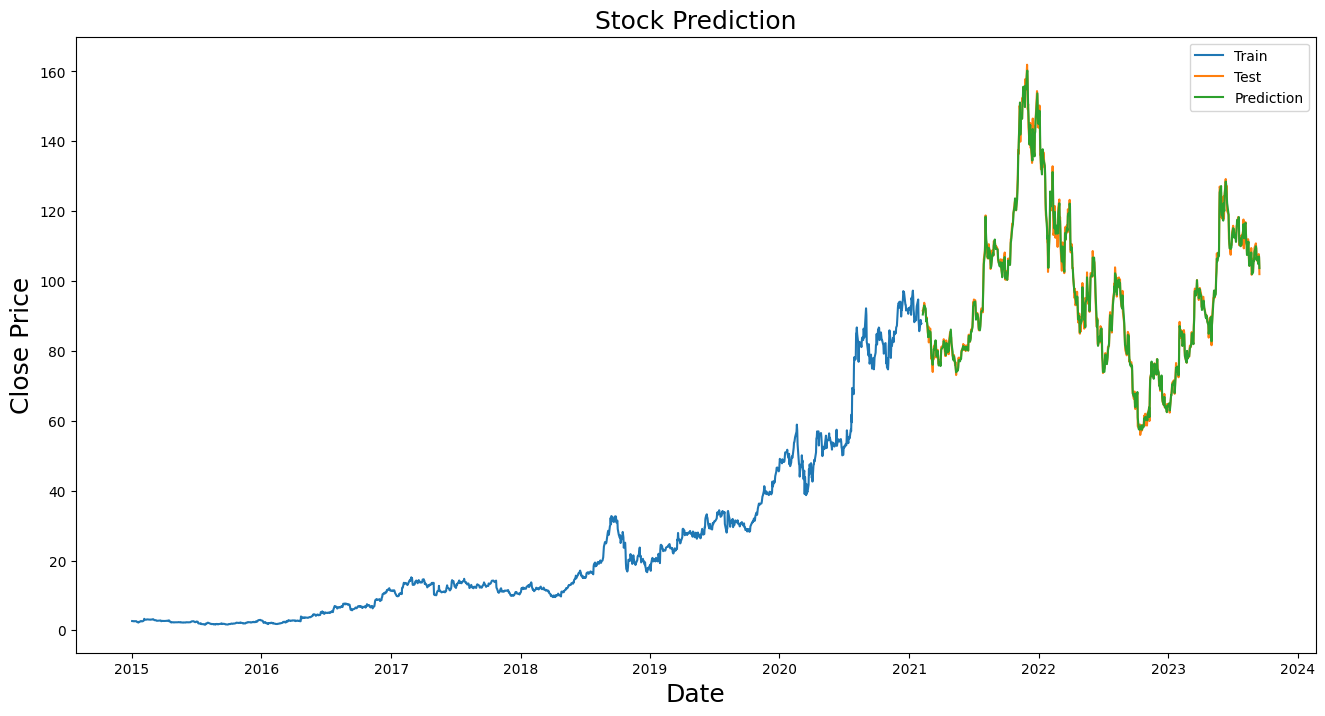

In [27]:
plt.figure(figsize=(16, 8))
plt.plot(data[0:rows-test_size]['Close'], label='Train')
test = data[(rows-test_size)+1:rows]
test["y_pred"] = prediction
plt.plot(test["Close"] ,label='Test')
plt.plot(test["y_pred"], label='Prediction')

plt.title('Stock Prediction', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend()
plt.show()